In [23]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.decomposition import PCA

In [24]:
# 데이터 불러오기
car = pd.read_csv('C:\\Users\\USER\\OneDrive\\Desktop\pandas-data-analysis-main\\cars (1).csv')
brand = pd.read_csv('C:\\Users\\USER\\OneDrive\\Desktop\\pandas-data-analysis-main\\brand (1).csv')

In [25]:
brand

,title,country
0,skoda,Czech Republic
1,vauxhall,United Kingdom
2,hyundai,South Korea
3,mini,United Kingdom
4,ford,United States
5,volvo,Sweden
6,peugeot,France
7,bmw,Germany
8,citroen,France
9,mercedes-benz,Germany


In [26]:
car

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history
0,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN
1,VAUXHALL CORSA,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,Full
2,HYUNDAI I30,949,137000,2011,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,NaN
3,MINI HATCH,2395,96731,2010,5.0,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 4,Full
4,VAUXHALL CORSA,1000,85000,2013,NaN,Diesel,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3682,RENAULT MEGANE,1395,76202,2006,4.0,Petrol,Hatchback,1.6L,Manual,5.0,5.0,Euro 4,NaN
3683,AUDI A4,6990,119000,2012,NaN,Petrol,Saloon,2.0L,Manual,4.0,5.0,Euro 5,NaN
3684,BMW 3 SERIES,3995,139000,2013,NaN,Diesel,Saloon,2.0L,Manual,4.0,5.0,Euro 5,NaN
3685,HONDA ACCORD,1390,179190,2007,NaN,Diesel,Estate,2.2L,Manual,5.0,5.0,Euro 4,Full


- title라는 변수에 띄어쓰기 기준으로 구분한 다음, 소문자로 변경 

In [27]:
car['brand title'] = car['title'].str.split(expand=True)[0].str.lower()

- brand에 title이라는 칼럼을 brand title로 변경, 열로 변경 

In [28]:
brand.rename({'title': 'brand title'}, axis=1, inplace=True)

- brand title을 기준으로 병합, 왼쪽을 기준으로 한다 

In [29]:
car_df = car.merge(brand, on='brand title', how='left')

- 중복값은 제거한다 

In [30]:
car_df = car_df.drop_duplicates()


- 문자를 숫자로 변환 

In [31]:
car_df = pd.get_dummies(car_df, 
    columns=['Fuel type','Body type','Gearbox','Service history','brand title','country'],
    drop_first=True)

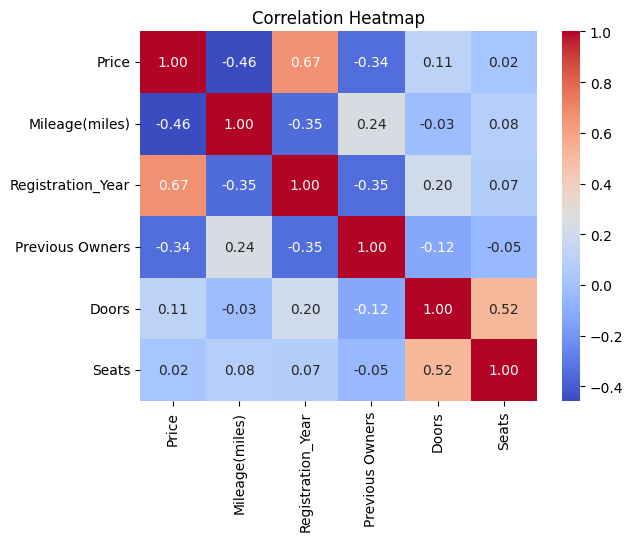

In [32]:
import matplotlib.pyplot as plt  # matplotlib.pyplot import 추가

# 수치형 데이터만 선택하여 NaN 값 처리
# 수치형 데이터만 고르고, 결측치(NAN) 값을 각 컬럼의 평균값으로 채우기 
# np.number는 숫자형 데이터 타입을 의미
# fillna(car_df.mean(numeric_only=True)) 숫자형 컬럼만 골라 평균을 계산하고 결측치를 매꿔줘 
car_df_cleaned = car_df.select_dtypes(include=[np.number]).fillna(car_df.mean(numeric_only=True))

# 데이터의 숫자 컬럼들끼리 서로 얼마나 관련(상관관계)이 있는지 계산
correlation_matrix = car_df_cleaned.corr()

# heatmap 그리기
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()
# ...existing code...

In [33]:
car_df.columns


Index(['title', 'Price', 'Mileage(miles)', 'Registration_Year',
       'Previous Owners', 'Engine', 'Doors', 'Seats', 'Emission Class',
       'Fuel type_Diesel Hybrid', 'Fuel type_Electric', 'Fuel type_Petrol',
       'Fuel type_Petrol Hybrid', 'Fuel type_Petrol Plug-in Hybrid',
       'Body type_Convertible', 'Body type_Coupe', 'Body type_Estate',
       'Body type_Hatchback', 'Body type_MPV', 'Body type_Minibus',
       'Body type_Pickup', 'Body type_SUV', 'Body type_Saloon',
       'Gearbox_Manual', 'brand title_alfa', 'brand title_audi',
       'brand title_bmw', 'brand title_chevrolet', 'brand title_chrysler',
       'brand title_citroen', 'brand title_dacia', 'brand title_daewoo',
       'brand title_daihatsu', 'brand title_dodge', 'brand title_ds',
       'brand title_fiat', 'brand title_ford', 'brand title_honda',
       'brand title_hyundai', 'brand title_infiniti', 'brand title_isuzu',
       'brand title_jaguar', 'brand title_jeep', 'brand title_kia',
       'brand title_la

- 제품명, 가격, 마일리지, 현재 년도의 열을 추출할 것이고, 가격을 종속변수로 사용

In [34]:
# 단순회귀분석에 변수로 사용할 열 선택 
features = car_df[['title',	'Price',	'Mileage(miles)',	'Registration_Year']]
features.head()

,title,Price,Mileage(miles),Registration_Year
0,SKODA FABIA,6900,70189,2016
1,VAUXHALL CORSA,1495,88585,2008
2,HYUNDAI I30,949,137000,2011
3,MINI HATCH,2395,96731,2010
4,VAUXHALL CORSA,1000,85000,2013


- 종속변수와 다른 변수와의 선형관계를 그래프로 확인

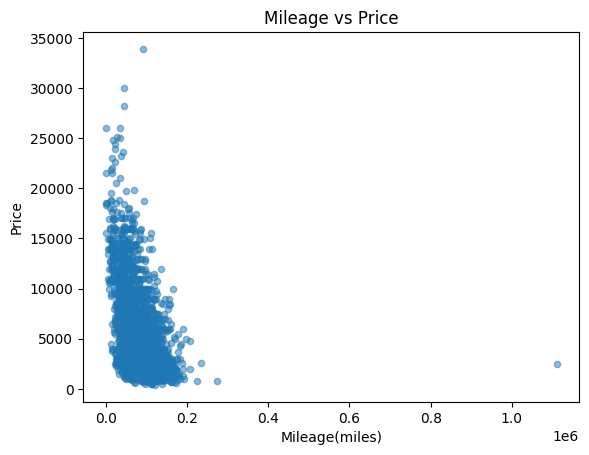

In [43]:
features.plot(kind='scatter', x='Mileage(miles)', y='Price', alpha=0.5)
plt.title('Mileage vs Price')   
plt.xlabel('Mileage(miles)')
plt.ylabel('Price')
plt.show()

- seaborn으로 산점도 그리기 
- fig.add_subplot(1, 2, 2)
- 전체 레이아웃을 1행 2열로 동일하게 나누고
- 두 번째 subplot을 선택
- 이걸 ax2 변수에 담음

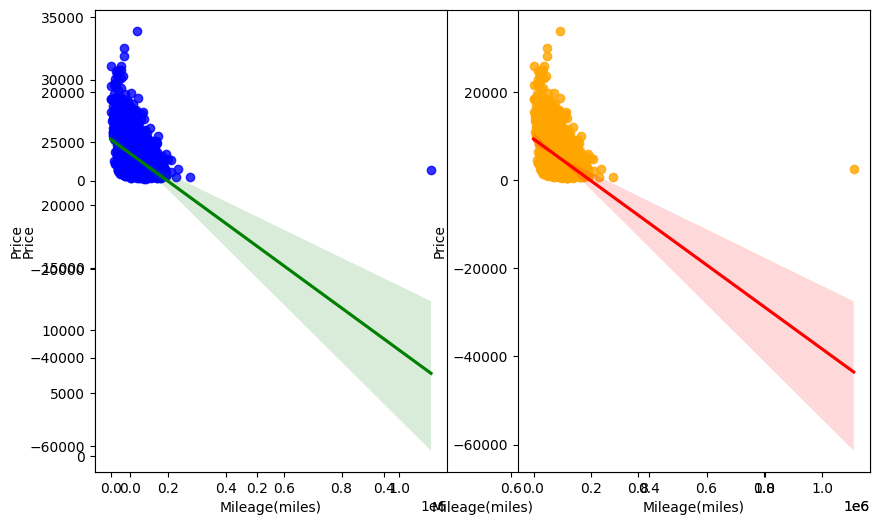

In [51]:
fig = plt.figure(figsize=(10, 6))
sns.scatterplot(data=features, x='Mileage(miles)', y='Price')   
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
sns.regplot(data=features, x='Mileage(miles)', y='Price', ax=ax1, scatter_kws={'color':'blue'}, line_kws={'color':'green'})
sns.regplot(data=features, x='Mileage(miles)', y='Price', ax=ax2, scatter_kws={'color':'orange'}, line_kws={'color':'red'})
plt.show()  